In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [4]:
import warnings
warnings.simplefilter('ignore')

In [5]:
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

### Read the dataset for churn 

In [6]:
ds = pd.read_csv("C:/Users/Olena/Desktop/ITSS/files/variant_4.csv")

In [7]:
print('columns count - ',len(ds.columns), '\n')
print('columns: ',list(ds.columns))

columns count -  43 

columns:  ['Unnamed: 0', 'Marital status', 'Application mode', 'Application order', 'Course', 'Daytime/evening attendance\t', 'Previous qualification', 'Previous qualification (grade)', 'Nacionality', "Mother's qualification", "Father's qualification", "Mother's occupation", "Father's occupation", 'Admission grade', 'Displaced', 'Educational special needs', 'Debtor', 'Tuition fees up to date', 'Gender', 'Scholarship holder', 'Age at enrollment', 'International', 'Curricular units 1st sem (credited)', 'Curricular units 1st sem (enrolled)', 'Curricular units 1st sem (evaluations)', 'Curricular units 1st sem (approved)', 'Curricular units 1st sem (grade)', 'Curricular units 1st sem (without evaluations)', 'Curricular units 2nd sem (credited)', 'Curricular units 2nd sem (enrolled)', 'Curricular units 2nd sem (evaluations)', 'Curricular units 2nd sem (approved)', 'Curricular units 2nd sem (grade)', 'Curricular units 2nd sem (without evaluations)', 'Unemployment rate', 

In [9]:
display(ds.head(5))

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Citizenship,Family Position,Attendance,Field of Study,Special Needs
0,0,1,17,5,171.0,1.0,1.0,122.0,1,19,12,5.0,9.0,127.3,1,0,0,1,1,0,20,0.0,0,0.0,0,0.0,0.000000,0.0,0.0,0.0,0.0,0,0.000000,0,10.8,1.4,1.74,Dropout,Budapest,Youngest Child,Online,Science,Special Needs
1,1,1,15,1,9254.0,1.0,1.0,NaN,1,1,3,3.0,3.0,142.5,1,0,0,0,1,0,19,0.0,0,6.0,6,6.0,14.000000,NaN,0.0,6.0,6.0,6,13.666667,0,13.9,-0.3,0.79,Graduate,Oslo,NaN,Full-Time,Arts,NaN
2,2,1,1,5,9070.0,1.0,1.0,NaN,1,37,37,9.0,9.0,124.8,1,0,0,0,1,0,19,0.0,0,6.0,0,0.0,0.000000,NaN,0.0,6.0,0.0,0,0.000000,0,10.8,1.4,1.74,Dropout,Edinburgh,NaN,Part-Time,Commerce,NaN
3,3,1,17,2,9773.0,1.0,1.0,122.0,1,38,37,5.0,3.0,119.6,1,0,0,1,0,0,20,0.0,0,6.0,8,6.0,13.428571,0.0,0.0,6.0,10.0,5,12.400000,0,9.4,-0.8,-3.12,Graduate,Budapest,Middle Child,Part-Time,Commerce,No Special Needs
4,4,2,39,1,8014.0,0.0,1.0,100.0,1,37,38,9.0,9.0,141.5,0,0,0,1,0,0,45,0.0,0,6.0,9,5.0,12.333333,0.0,0.0,6.0,6.0,6,13.000000,0,13.9,-0.3,0.79,Graduate,London,Youngest Child,Part-Time,Commerce,No Special Needs


In [10]:
print("Any missing sample in training set:",ds.isnull().values.any())

Any missing sample in training set: True


In [11]:
missing = list()
for x in ds.columns:
    if ds[x].isnull().sum() != 0:
        print(x, ds[x].isnull().sum())
        missing.append(x)

Course 221
Daytime/evening attendance	 110
Previous qualification 221
Previous qualification (grade) 2323
Mother's occupation 221
Father's occupation 110
International 325
Curricular units 1st sem (enrolled) 221
Curricular units 1st sem (approved) 221
Curricular units 1st sem (grade) 435
Curricular units 1st sem (without evaluations) 2212
Curricular units 2nd sem (credited) 221
Curricular units 2nd sem (enrolled) 110
Curricular units 2nd sem (evaluations) 110
Curricular units 2nd sem (grade) 110
Inflation rate 110
Citizenship 465
Family Position 2323
Special Needs 2212


In [12]:
numeric_column = ds.select_dtypes(include='number').columns
print(numeric_column)

Index(['Unnamed: 0', 'Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
       'Mother's qualification', 'Father's qualification',
       'Mother's occupation', 'Father's occupation', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curric

## Data engineering 

#### Missing data imputation

In [44]:
mean_impute_columns = [
       'Admission grade',
       'Previous qualification',
       'Previous qualification (grade)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)',
       'Inflation rate', 'GDP']
mode_impute_columns = ['Unemployment rate']

In [45]:
def impute_na(df, variable, value):

    return df[variable].fillna(value)

In [46]:
# Let's create a dict of mean values

mean_impute_values = dict()
for column in mean_impute_columns:
    mean_impute_values[column] = ds[column].mean()
print(mean_impute_values)

{'Admission grade': 126.97811934900544, 'Previous qualification': 4.6302640970735185, 'Previous qualification (grade)': 132.57405997144215, 'Curricular units 1st sem (enrolled)': 6.285986200333095, 'Curricular units 1st sem (evaluations)': 8.299050632911392, 'Curricular units 1st sem (approved)': 4.696883178681894, 'Curricular units 1st sem (grade)': 10.635909431107468, 'Curricular units 1st sem (without evaluations)': 0.13517179023508138, 'Curricular units 2nd sem (credited)': 0.549845348560552, 'Curricular units 2nd sem (enrolled)': 6.237366713027353, 'Curricular units 2nd sem (evaluations)': 8.061196105702363, 'Curricular units 2nd sem (approved)': 4.435804701627487, 'Curricular units 2nd sem (grade)': 10.232829111546906, 'Curricular units 2nd sem (without evaluations)': 0.15031645569620253, 'Inflation rate': 1.2293694946685212, 'GDP': 0.001968806509945778}


In [47]:
for column in mean_impute_columns:
    ds[column] = impute_na(ds, column, mean_impute_values[column])

In [48]:
# Let's create a dict of mode values

mode_impute_values = dict()
for column in mode_impute_columns:
    mode_impute_values[column] = ds[column].mode()[0]
print(mode_impute_values)

{'Unemployment rate': 7.6}


In [49]:
for column in mode_impute_columns:
    ds[column] = impute_na(ds, column, mode_impute_values[column])

##### Outlier Engineering

In [50]:
outlier_columns = ['Admission grade',
       'Previous qualification',
       'Previous qualification (grade)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)']


In [51]:
ds = ds[(np.abs(stats.zscore(ds[outlier_columns])) < 4).all(axis=1)]

##### Categorical encoding

In [54]:
cat_columns = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality', 'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 'Scholarship holder',
       'Age at enrollment', 'International', 'Unemployment rate',
       'Inflation rate', 'GDP']

In [55]:
map_dicts = dict()
for column in cat_columns:
    ds[column] = ds[column].astype('category')
    map_dicts[column] = dict(zip(ds[column], ds[column].cat.codes))
    ds[column] = ds[column].cat.codes
    

In [56]:
display(ds.sample(15))

,Unnamed: 0,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,Mother's occupation,Father's occupation,Admission grade,Displaced,Educational special needs,Debtor,Tuition fees up to date,Gender,Scholarship holder,Age at enrollment,International,Curricular units 1st sem (credited),Curricular units 1st sem (enrolled),Curricular units 1st sem (evaluations),Curricular units 1st sem (approved),Curricular units 1st sem (grade),Curricular units 1st sem (without evaluations),Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target,Citizenship,Family Position,Attendance,Field of Study,Special Needs
4403,4403,0,7,2,11,1,0,36,0,1,1,4.0,10.0,243,1,0,0,1,1,1,2,0,0,7.0,11,6.0,12.412500,0.135172,0.0,8.0,12.0,7,11.262500,0,8,8,0,Graduate,Prague,NaN,Full-Time,Commerce,NaN
3809,3809,1,9,0,2,0,0,20,0,34,34,0.0,0.0,46,0,0,0,1,0,0,37,0,0,6.0,8,4.0,12.750000,0.000000,0.0,6.0,12.0,5,12.600000,0,0,7,4,Dropout,NaN,Middle Child,Part-Time,Science,No Special Needs
4008,4008,0,8,2,15,1,0,31,0,38,37,5.0,9.0,163,1,0,0,0,1,0,2,0,0,6.0,10,4.0,12.000000,0.000000,0.0,6.0,12.0,0,0.000000,0,3,6,6,Dropout,Sofia,First Child,Online,Arts,Special Needs
1480,1480,0,14,0,5,1,16,36,0,1,1,9.0,4.0,483,1,0,0,1,1,1,5,0,1,7.0,11,5.0,12.166667,0.135172,4.0,8.0,14.0,5,14.800000,0,1,6,9,Dropout,Milan,NaN,Full-Time,Commerce,NaN
4214,4214,0,0,1,11,1,0,36,0,38,37,5.0,6.0,238,1,0,0,1,0,1,2,0,0,7.0,9,7.0,13.312500,0.135172,0.0,8.0,8.0,8,15.637500,0,7,1,5,Graduate,Vienna,NaN,Part-Time,Science,NaN
4386,4386,0,7,0,13,1,0,18,0,37,38,8.0,7.0,147,1,0,0,1,0,1,4,0,0,5.0,7,3.0,12.333333,0.000000,0.0,5.0,5.0,2,12.500000,0,0,7,4,Dropout,Sofia,Middle Child,Online,Science,Special Needs
23,23,0,0,3,13,1,0,36,0,1,38,4.0,7.0,144,1,0,0,1,0,1,2,0,0,6.0,8,6.0,13.375000,0.135172,0.0,6.0,7.0,6,12.285714,0,4,4,8,Graduate,Kyiv,NaN,Part-Time,Science,NaN
4360,4360,0,7,3,11,1,0,48,0,19,37,4.0,8.0,328,1,0,0,1,0,0,2,0,0,7.0,7,6.0,11.966667,0.000000,0.0,7.0,7.0,6,11.966667,0,0,7,4,Graduate,Amsterdam,Middle Child,Online,Engineering,No Special Needs
1151,1151,0,7,0,1,1,0,54,0,37,37,9.0,1.0,486,1,0,0,1,0,0,2,0,0,0.0,0,0.0,0.000000,0.000000,0.0,0.0,0.0,0,0.000000,0,8,8,0,Dropout,Bucharest,First Child,Evening Classes,Arts,Special Needs
3795,3795,0,0,2,6,1,0,36,0,4,38,2.0,7.0,76,1,0,0,1,1,0,1,0,0,5.0,8,5.0,14.000000,0.135172,0.0,5.0,6.0,5,13.200000,0,1,6,9,Graduate,Sofia,NaN,Evening Classes,Science,NaN


In [57]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4199 entries, 0 to 4423
Data columns (total 43 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Unnamed: 0                                      4199 non-null   int64  
 1   Marital status                                  4199 non-null   int8   
 2   Application mode                                4199 non-null   int8   
 3   Application order                               4199 non-null   int8   
 4   Course                                          4199 non-null   int8   
 5   Daytime/evening attendance	                     4199 non-null   int8   
 6   Previous qualification                          4199 non-null   int8   
 7   Previous qualification (grade)                  4199 non-null   int8   
 8   Nacionality                                     4199 non-null   int8   
 9   Mother's qualification                        

# Modelling

## Classification

In [59]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
# from lightgbm import LGBMClassifier

from sklearn.model_selection import train_test_split

from sklearn import metrics

#### Define target and features columns

In [100]:
y_column = ['Scholarship holder'] # target variable
X_columns = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
    'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender', 
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']
X = ds[X_columns]
y = ds[y_column]

#### Train test set split

In [101]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [102]:
reg_log = LogisticRegression()
reg_log.fit(X_train, y_train)
y_pred = reg_log.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.94      0.85       952
           1       0.43      0.14      0.21       308

    accuracy                           0.74      1260
   macro avg       0.60      0.54      0.53      1260
weighted avg       0.69      0.74      0.69      1260



In [103]:
# Let's train SVC with default parameters

svc_classifier = SVC()
svc_classifier.fit(X_train, y_train)
y_pred = svc_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.76      1.00      0.86       952
           1       0.00      0.00      0.00       308

    accuracy                           0.76      1260
   macro avg       0.38      0.50      0.43      1260
weighted avg       0.57      0.76      0.65      1260



In [104]:
# Let's train GaussianNB with default parameters

gnb_classifier = GaussianNB()
gnb_classifier.fit(X_train, y_train)
y_pred = gnb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.51      0.63       952
           1       0.32      0.71      0.44       308

    accuracy                           0.56      1260
   macro avg       0.58      0.61      0.54      1260
weighted avg       0.72      0.56      0.58      1260



In [105]:
# Let's train SGDClassifier with default parameters

sgd_classifier = SGDClassifier()
sgd_classifier.fit(X_train, y_train)
y_pred = sgd_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.89      0.83       952
           1       0.39      0.21      0.28       308

    accuracy                           0.73      1260
   macro avg       0.59      0.55      0.55      1260
weighted avg       0.68      0.73      0.70      1260



In [106]:
# Let's train KNeighborsClassifier with default parameters

kn_classifier = KNeighborsClassifier()
kn_classifier.fit(X_train, y_train)
y_pred = kn_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.83      0.81       952
           1       0.37      0.30      0.33       308

    accuracy                           0.70      1260
   macro avg       0.58      0.57      0.57      1260
weighted avg       0.68      0.70      0.69      1260



In [107]:
# Let's train DecisionTreeClassifier with default parameters

dt_classifier = DecisionTreeClassifier()
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.80      0.77      0.78       952
           1       0.36      0.40      0.38       308

    accuracy                           0.68      1260
   macro avg       0.58      0.58      0.58      1260
weighted avg       0.69      0.68      0.68      1260



In [108]:
# Let's train RandomForestClassifier with default parameters

rf_classifier = RandomForestClassifier()
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.92      0.85       952
           1       0.46      0.20      0.28       308

    accuracy                           0.75      1260
   macro avg       0.62      0.56      0.56      1260
weighted avg       0.70      0.75      0.71      1260



In [109]:
# Let's train RandomForestClassifier with non-default parameters

rf_classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', max_depth = 20)
rf_classifier.fit(X_train, y_train)
y_pred = rf_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       952
           1       0.45      0.26      0.33       308

    accuracy                           0.74      1260
   macro avg       0.62      0.58      0.59      1260
weighted avg       0.71      0.74      0.72      1260



In [110]:
# Let's train GradientBoostingClassifier with default parameters

gb_classifier = GradientBoostingClassifier()
gb_classifier.fit(X_train, y_train)
y_pred = gb_classifier.predict(X_test)
print(metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.92      0.85       952
           1       0.49      0.24      0.33       308

    accuracy                           0.75      1260
   macro avg       0.64      0.58      0.59      1260
weighted avg       0.72      0.75      0.72      1260



### Feature importances

In [111]:
# we can use Random forest classifier 
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. Admission grade (0.085203)
2. Curricular units 2nd sem (grade) (0.082845)
3. Curricular units 1st sem (grade) (0.076223)
4. Age at enrollment (0.073178)
5. Curricular units 2nd sem (evaluations) (0.052651)
6. Curricular units 2nd sem (approved) (0.050917)
7. Course (0.050364)
8. Previous qualification (grade) (0.050168)
9. Curricular units 1st sem (evaluations) (0.049025)
10. Curricular units 1st sem (approved) (0.048942)
11. Unemployment rate (0.044187)
12. Application mode (0.043412)
13. GDP (0.042987)
14. Inflation rate (0.033642)
15. Application order (0.030227)
16. Curricular units 1st sem (enrolled) (0.026235)
17. Curricular units 2nd sem (enrolled) (0.025839)
18. Gender (0.019925)
19. Curricular units 1st sem (without evaluations) (0.017874)
20. Displaced (0.016658)
21. Curricular units 1st sem (credited) (0.013356)
22. Previous qualification (0.009525)
23. Curricular units 2nd sem (credited) (0.009483)
24. Debtor (0.009108)
25. International (0.006983)
26. T

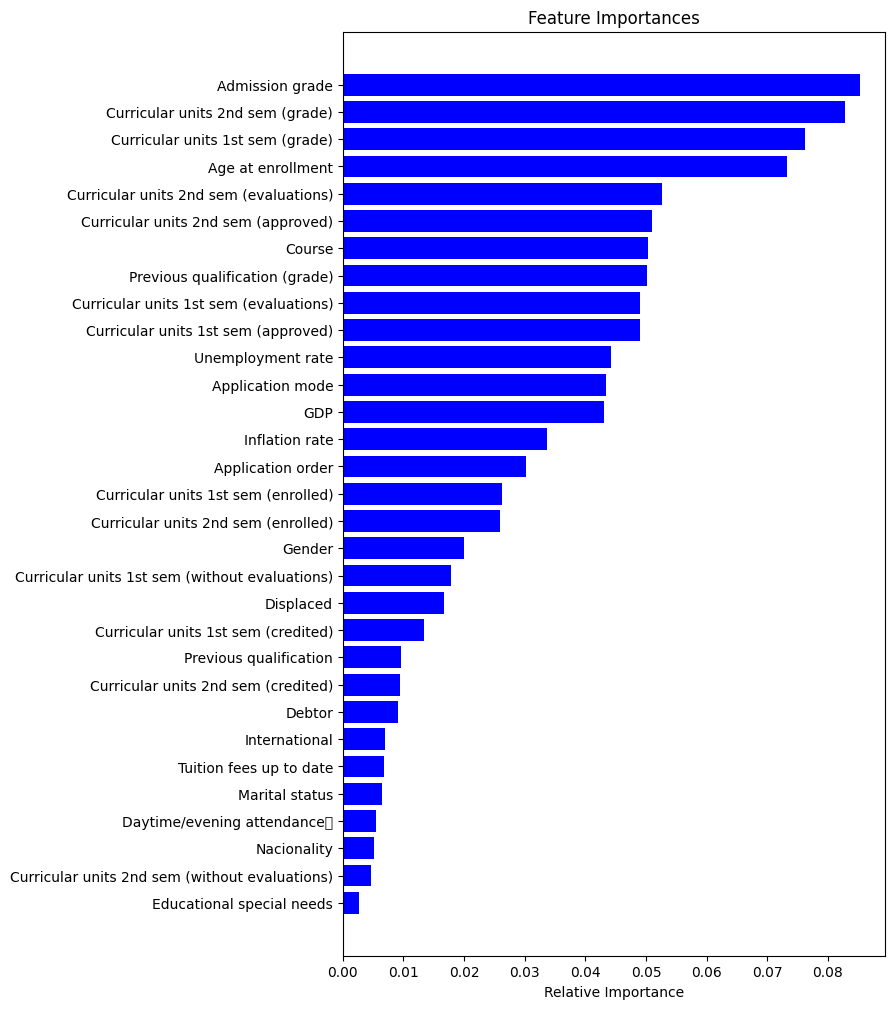

In [112]:
importances = rf_classifier.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [115]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(gnb_classifier, X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Gender (0.004762)
2. Application mode (0.003968)
3. Unemployment rate (0.003016)
4. Curricular units 1st sem (without evaluations) (0.003016)
5. Admission grade (0.001905)
6. GDP (0.001746)
7. Debtor (0.001429)
8. Inflation rate (0.001270)
9. Application order (0.001270)
10. Curricular units 2nd sem (evaluations) (0.001111)
11. Previous qualification (0.000952)
12. Course (0.000794)
13. Curricular units 2nd sem (without evaluations) (0.000635)
14. Previous qualification (grade) (0.000476)
15. International (0.000476)
16. Curricular units 2nd sem (approved) (0.000476)
17. Age at enrollment (0.000317)
18. Daytime/evening attendance	 (-0.000476)
19. Educational special needs (-0.000635)
20. Displaced (-0.000794)
21. Curricular units 2nd sem (enrolled) (-0.000952)
22. Marital status (-0.001429)
23. Curricular units 1st sem (enrolled) (-0.002063)
24. Curricular units 1st sem (evaluations) (-0.002698)
25. Nacionality (-0.003492)
26. Curricular units 1st sem (approved) (-0

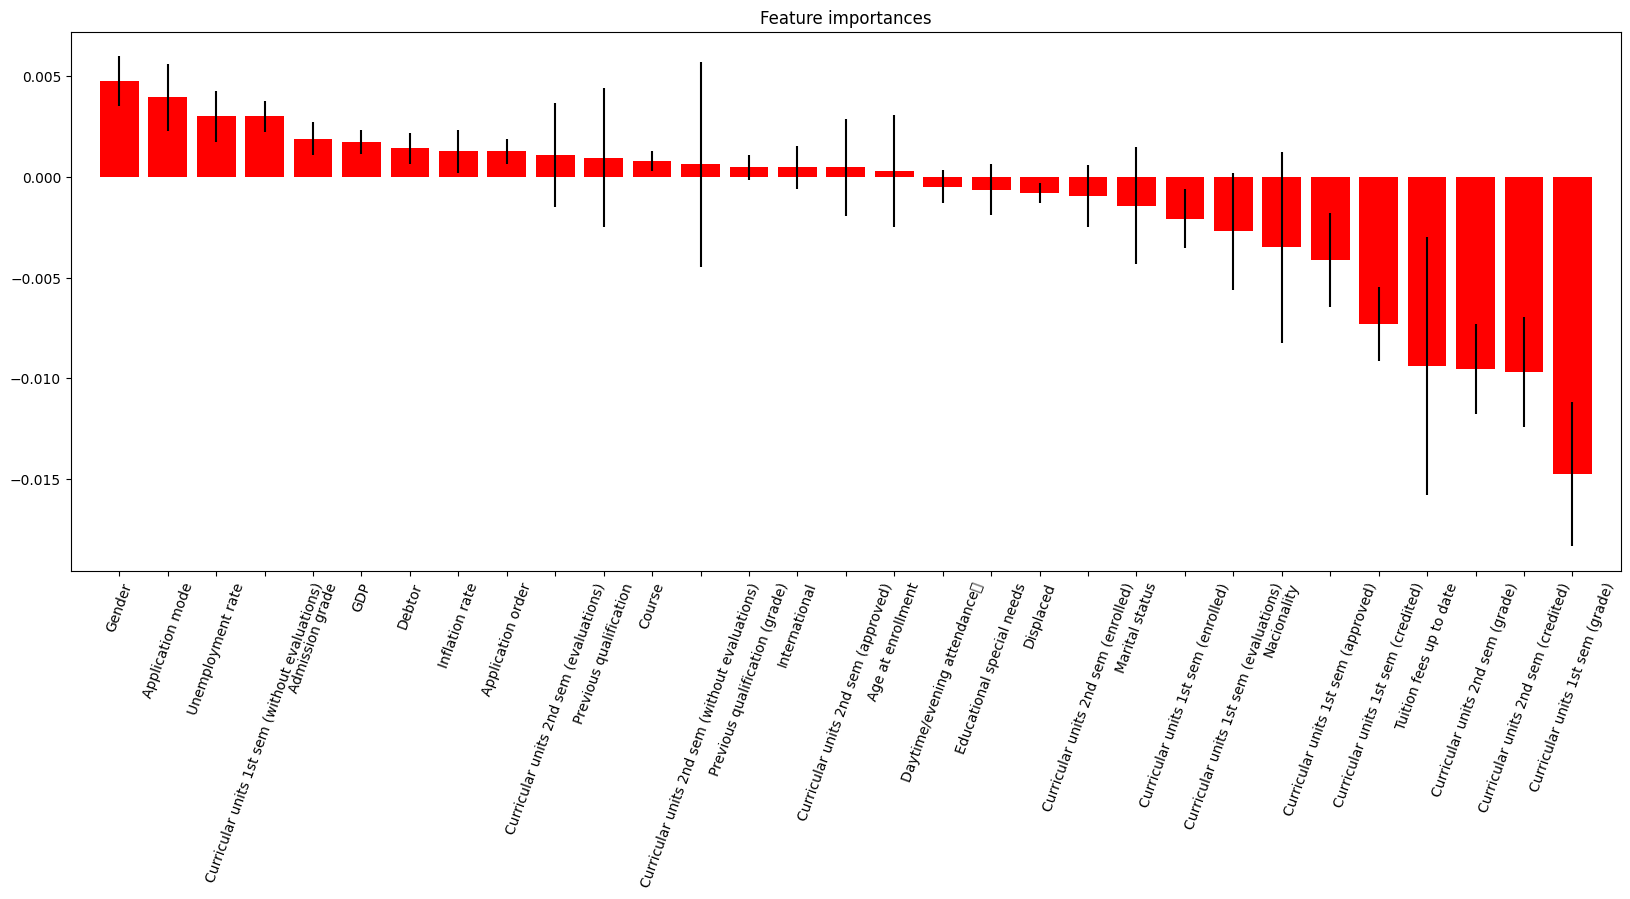

In [116]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()

## Regression

In [92]:
from sklearn.linear_model import LinearRegression
from lightgbm import LGBMRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import BayesianRidge
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR

from sklearn.model_selection import train_test_split

from sklearn import metrics

In [93]:
# Let's predict  Scholarship holder 

y_column = 'Scholarship holder'

X_columns = ['Marital status', 'Application mode', 'Application order',
       'Course', 'Daytime/evening attendance\t', 'Previous qualification',
       'Previous qualification (grade)', 'Nacionality',
    'Admission grade',
       'Displaced', 'Educational special needs', 'Debtor',
       'Tuition fees up to date', 'Gender',
       'Age at enrollment', 'International',
       'Curricular units 1st sem (credited)',
       'Curricular units 1st sem (enrolled)',
       'Curricular units 1st sem (evaluations)',
       'Curricular units 1st sem (approved)',
       'Curricular units 1st sem (grade)',
       'Curricular units 1st sem (without evaluations)',
       'Curricular units 2nd sem (credited)',
       'Curricular units 2nd sem (enrolled)',
       'Curricular units 2nd sem (evaluations)',
       'Curricular units 2nd sem (approved)',
       'Curricular units 2nd sem (grade)',
       'Curricular units 2nd sem (without evaluations)', 'Unemployment rate',
       'Inflation rate', 'GDP']
X = ds[X_columns]
y = ds[y_column]

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [95]:
models = {
    'LinearRegression' : LinearRegression(),
'LGBMRegressor' :LGBMRegressor(), 
'SGDRegressor' :SGDRegressor(), 
'RandomForestRegressor' :RandomForestRegressor(), 
'ElasticNet' :ElasticNet(), 
'BayesianRidge' :BayesianRidge(), 
'GradientBoostingRegressor' :GradientBoostingRegressor(), 
'SVR' :SVR(), 
}

In [96]:
regressors = dict()
for name, model in models.items():
    print('training ',name)
    regressor = model
    regressor.fit(X_train, y_train)
    y_pred = regressor.predict(X_test)
    print(metrics.mean_absolute_error(y_test, y_pred))
    print(metrics.mean_absolute_percentage_error(y_test, y_pred))
    regressors[name] = regressor


training  LinearRegression
0.34413612931133775
830773136929797.1
training  LGBMRegressor
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001062 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1109
[LightGBM] [Info] Number of data points in the train set: 2939, number of used features: 31
[LightGBM] [Info] Start training from score 0.258932
0.32228042062733975
764522730609202.8
training  SGDRegressor
28789884372161.816
9.635596238123255e+28
training  RandomForestRegressor
0.33168253968253963
814257961199423.0
training  ElasticNet
0.3745288086039181
877739029640294.9
training  BayesianRidge
0.3444654629793722
825122249501209.6
training  GradientBoostingRegressor
0.32686485129640724
770305985211849.6
training  SVR
0.2955271818674566
340150909001868.0


### Feature importances

In [97]:
# we can use Random forest classifier 
importances = regressors['RandomForestRegressor'].feature_importances_
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))


Feature ranking:
1. Admission grade (0.133879)
2. Curricular units 1st sem (grade) (0.093397)
3. Curricular units 2nd sem (approved) (0.089329)
4. Curricular units 2nd sem (grade) (0.087824)
5. Age at enrollment (0.076769)
6. Previous qualification (grade) (0.060492)
7. Curricular units 1st sem (evaluations) (0.046364)
8. Unemployment rate (0.044174)
9. Curricular units 2nd sem (evaluations) (0.044007)
10. Course (0.042382)
11. GDP (0.036814)
12. Application order (0.034275)
13. Application mode (0.031154)
14. Inflation rate (0.029077)
15. Curricular units 1st sem (approved) (0.024995)
16. Gender (0.015501)
17. Curricular units 1st sem (enrolled) (0.015255)
18. Displaced (0.014117)
19. Curricular units 1st sem (without evaluations) (0.013445)
20. Curricular units 2nd sem (enrolled) (0.011511)
21. Debtor (0.007292)
22. Previous qualification (0.007285)
23. Curricular units 1st sem (credited) (0.007235)
24. Curricular units 2nd sem (credited) (0.005591)
25. International (0.005172)
26. T

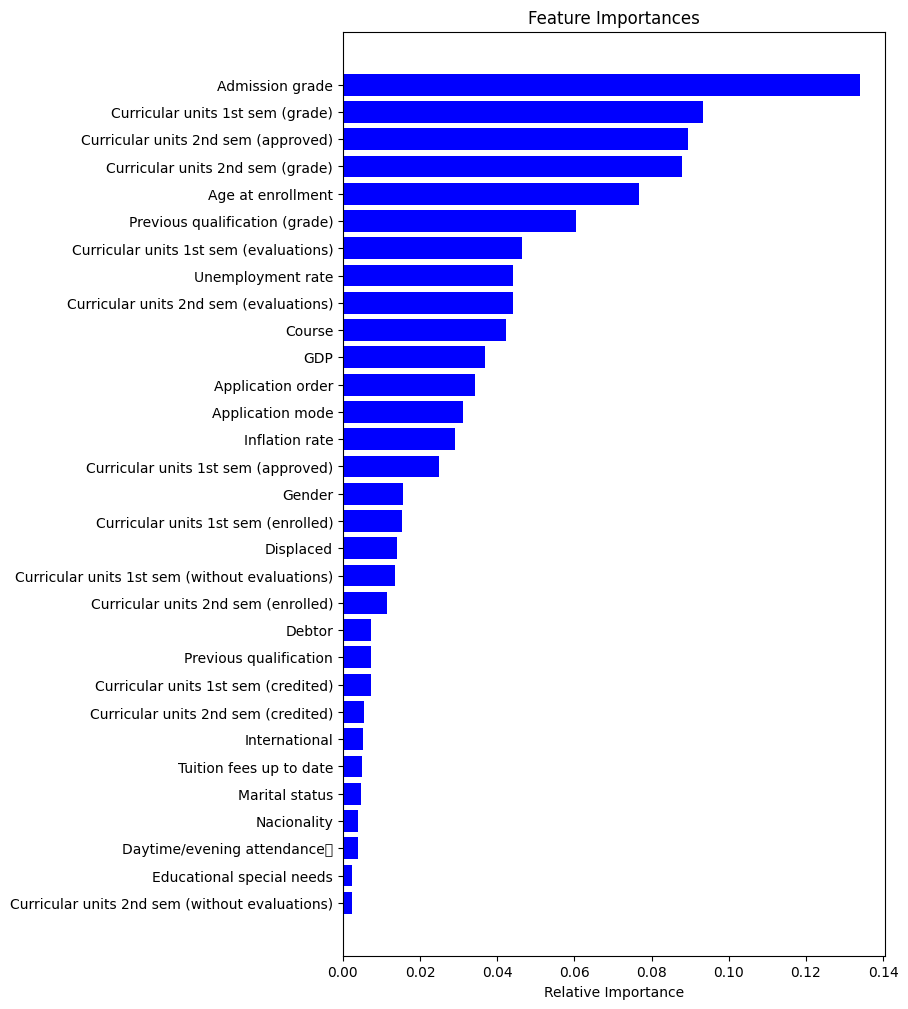

In [98]:
importances = regressors['RandomForestRegressor'].feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(7, 12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X_columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [99]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(regressors['ElasticNet'], X_test, y_test)
importances = imps.importances_mean
std = imps.importances_std
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")
for f in range(X_train.shape[1]):
    print("%d. %s (%f)" % (f + 1, X_columns[indices[f]], importances[indices[f]]))

Feature ranking:
1. Age at enrollment (0.015808)
2. GDP (0.000000)
3. Application mode (0.000000)
4. Application order (0.000000)
5. Course (0.000000)
6. Daytime/evening attendance	 (0.000000)
7. Previous qualification (0.000000)
8. Previous qualification (grade) (0.000000)
9. Nacionality (0.000000)
10. Admission grade (0.000000)
11. Displaced (0.000000)
12. Educational special needs (0.000000)
13. Debtor (0.000000)
14. Tuition fees up to date (0.000000)
15. Gender (0.000000)
16. International (0.000000)
17. Inflation rate (0.000000)
18. Curricular units 1st sem (credited) (0.000000)
19. Curricular units 1st sem (enrolled) (0.000000)
20. Curricular units 1st sem (evaluations) (0.000000)
21. Curricular units 1st sem (approved) (0.000000)
22. Curricular units 1st sem (grade) (0.000000)
23. Curricular units 1st sem (without evaluations) (0.000000)
24. Curricular units 2nd sem (credited) (0.000000)
25. Curricular units 2nd sem (enrolled) (0.000000)
26. Curricular units 2nd sem (evaluations

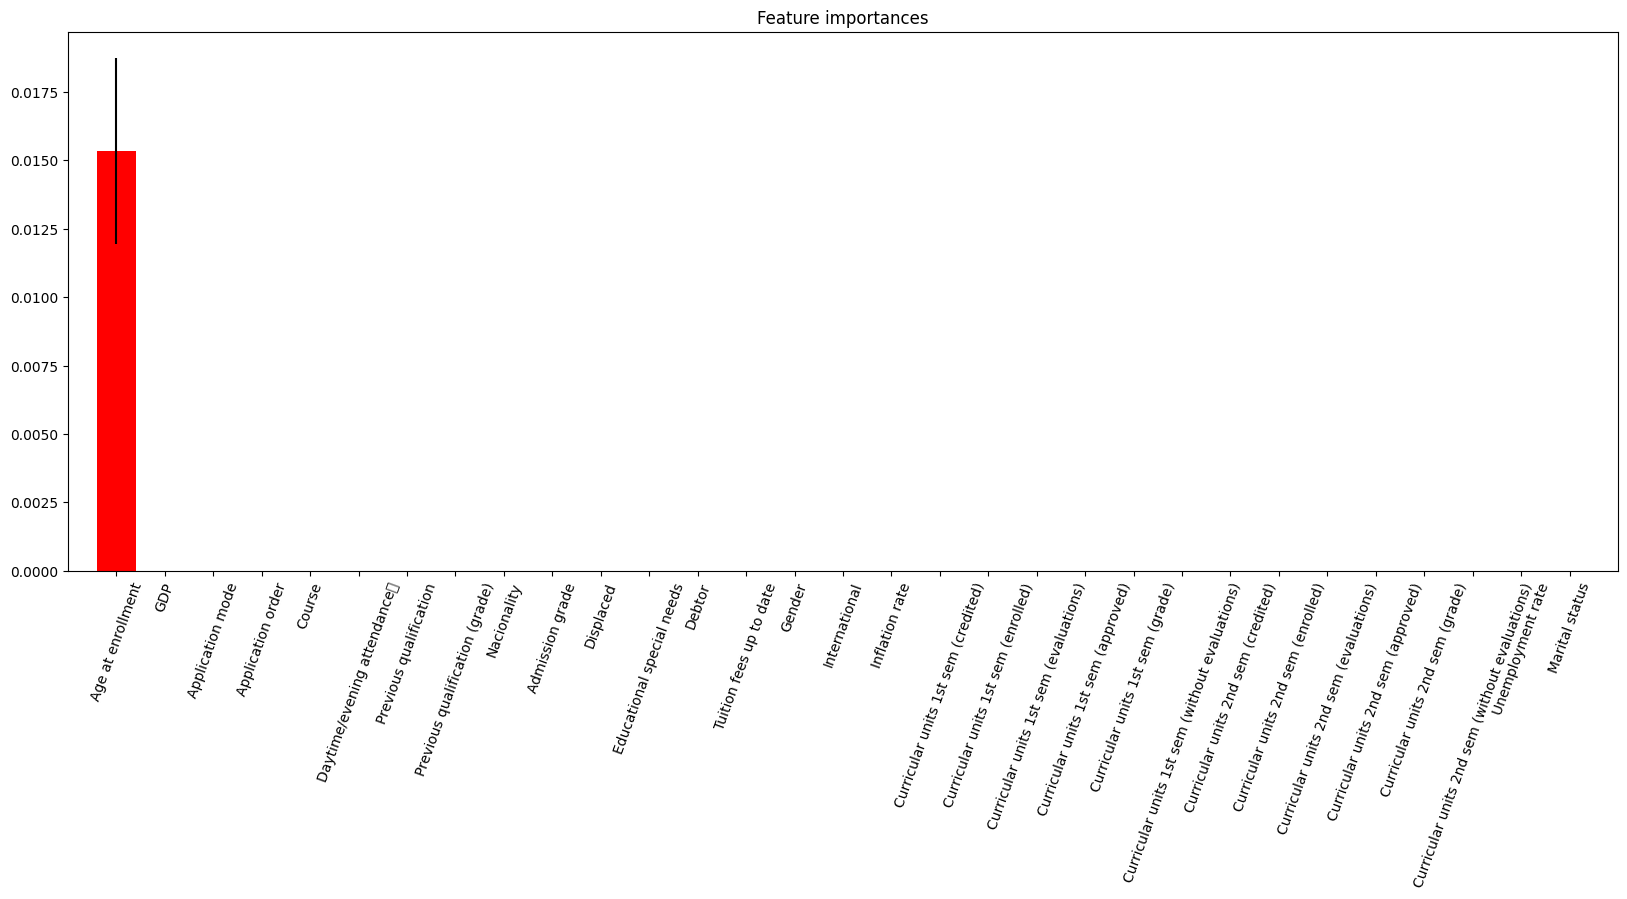

In [91]:
plt.figure(figsize=(20, 7))
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices], color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), [X_columns[indices[f]] for f in range(X_train.shape[1])])
plt.xticks(rotation=70)
plt.xlim([-1, X_train.shape[1]])
plt.show()